In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import glob
from PIL import Image

In [2]:
#find all images ending with .jpg

img_path = 'train/*.jpg'
img_all = glob.glob(img_path)

In [3]:
#list all images ending with .jpg

img_all

['train\\apple_1.jpg',
 'train\\apple_10.jpg',
 'train\\apple_11.jpg',
 'train\\apple_12.jpg',
 'train\\apple_13.jpg',
 'train\\apple_14.jpg',
 'train\\apple_15.jpg',
 'train\\apple_16.jpg',
 'train\\apple_17.jpg',
 'train\\apple_18.jpg',
 'train\\apple_19.jpg',
 'train\\apple_2.jpg',
 'train\\apple_20.jpg',
 'train\\apple_21.jpg',
 'train\\apple_22.jpg',
 'train\\apple_23.jpg',
 'train\\apple_24.jpg',
 'train\\apple_25.jpg',
 'train\\apple_26.jpg',
 'train\\apple_27.jpg',
 'train\\apple_28.jpg',
 'train\\apple_29.jpg',
 'train\\apple_3.jpg',
 'train\\apple_30.jpg',
 'train\\apple_31.jpg',
 'train\\apple_32.jpg',
 'train\\apple_33.jpg',
 'train\\apple_35.jpg',
 'train\\apple_36.jpg',
 'train\\apple_37.jpg',
 'train\\apple_38.jpg',
 'train\\apple_39.jpg',
 'train\\apple_4.jpg',
 'train\\apple_40.jpg',
 'train\\apple_41.jpg',
 'train\\apple_42.jpg',
 'train\\apple_43.jpg',
 'train\\apple_44.jpg',
 'train\\apple_45.jpg',
 'train\\apple_46.jpg',
 'train\\apple_47.jpg',
 'train\\apple_48.jp

In [4]:
#Recording all image sizes in a list

imgs = []

for filename in img_all:
    im = Image.open(filename)
    imgs.append(im.size)

In [5]:
#Converting the list into a numpy array

np_img = np.array(imgs)

np_img

array([[ 349,  349],
       [1500, 1500],
       [ 652,  436],
       [ 450,  428],
       [ 800,  800],
       [ 960,  640],
       [1400, 1046],
       [ 333,  300],
       [ 700,  800],
       [ 610,  458],
       [1600, 1200],
       [ 250,  250],
       [ 500,  500],
       [ 640,  426],
       [ 693,  693],
       [ 500,  500],
       [1132, 1696],
       [ 350,  241],
       [ 350,  241],
       [ 700,  350],
       [ 300,  300],
       [ 250,  250],
       [1000,  708],
       [ 800,  800],
       [ 780,  439],
       [1320,  947],
       [ 800,  797],
       [ 298,  450],
       [ 166,  171],
       [ 389,  352],
       [1300, 1390],
       [1366,  768],
       [ 351,  240],
       [ 620,  387],
       [ 338,  287],
       [ 500,  500],
       [ 720,  720],
       [ 337,  335],
       [ 602,  452],
       [ 800,  600],
       [ 960,  641],
       [ 960,  640],
       [ 271,  300],
       [ 620,  350],
       [ 300,  227],
       [ 260,  295],
       [ 468,  450],
       [ 300,

In [6]:
#Data sizes in table format

df = pd.DataFrame(np_img)

df.columns = ["Width", "Height"]
df

,Width,Height
0,349,349
1,1500,1500
2,652,436
3,450,428
4,800,800
...,...,...
235,500,380
236,600,600
237,1620,1080
238,600,393


In [7]:
#Descriptive statistics

df.describe()

,Width,Height
count,240.000000,240.000000
mean,789.216667,633.508333
std,489.659453,489.025553
min,166.000000,160.000000
25%,448.500000,350.000000
50%,640.000000,500.000000
75%,1013.250000,759.750000
max,3160.000000,4605.000000


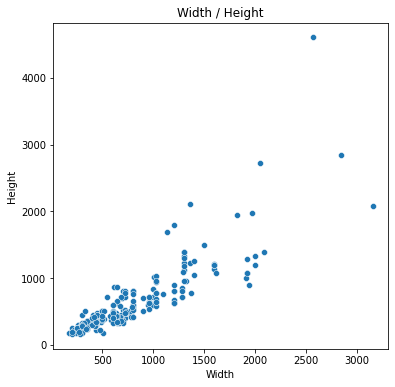

In [8]:
#Scatterplot of data sizes

fig = plt.subplots(figsize=(6,6))
sb.scatterplot(x='Width',y='Height',
              data=df,
              palette='tab10')
plt.title('Width / Height')
plt.show()

In [9]:
#Numpy concatenation

a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.array([[9, 10], [11, 12]])

x = a
x = np.concatenate((x, b))
x = np.concatenate((x, c))

x = x.reshape((-1, 2, 2))
x

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

# Training with processed images

In [10]:
x_train = None

for i in img_all:
    img_raw = Image.open(i).convert('RGB') #Convert all RGBA files to RGB for uniformity
    img_tiny = img_raw.resize((128,128)) #resize file to 128x128
    if x_train is None:
        x_train = img_tiny
    else:
        x_train = np.concatenate((x_train, img_tiny))

x_train = x_train.reshape(-1, 128, 128, 3) #reshape data
x_train.shape

C:\Users\skyli\anaconda3\envs\gputest\lib\site-packages\PIL\Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(240, 128, 128, 3)

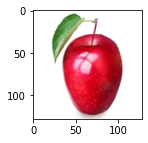

In [11]:
#Verify that data is reshaped correctly by randomly retrieving an individual data to view.

img2 = Image.fromarray(x_train[74])

plt.subplots(figsize=(2,2))
plt.imshow(img2)

In [12]:
#hot encoding the 4 categories of fruits

hot_encoding = []

for i in range(len(img_all)):
    if 'apple' in img_all[i]:
        hot_encoding.append([1,0,0,0])
    if 'banana' in img_all[i]:
        hot_encoding.append([0,1,0,0])
    if 'orange' in img_all[i]:
        hot_encoding.append([0,0,1,0])
    if 'mixed' in img_all[i]:
        hot_encoding.append([0,0,0,1])

print(len(hot_encoding))
hot_encoding

240


[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0,

In [13]:
y_train = np.array(hot_encoding)

In [14]:
#Constructing CNN model

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(128, 128, 3)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
hist = model.fit(x=x_train/255, y=y_train, batch_size=32, epochs=20)

Epoch 1/20
8/8 [==============================] - 5s 643ms/step - loss: 1.7796 - accuracy: 0.5125
Epoch 2/20
8/8 [==============================] - 5s 637ms/step - loss: 0.9152 - accuracy: 0.6417
Epoch 3/20
8/8 [==============================] - 5s 641ms/step - loss: 0.5570 - accuracy: 0.8458
Epoch 4/20
8/8 [==============================] - 5s 649ms/step - loss: 0.3563 - accuracy: 0.8875
Epoch 5/20
8/8 [==============================] - 5s 641ms/step - loss: 0.2659 - accuracy: 0.9000
Epoch 6/20
8/8 [==============================] - 5s 638ms/step - loss: 0.3143 - accuracy: 0.9000
Epoch 7/20
8/8 [==============================] - 5s 645ms/step - loss: 0.1881 - accuracy: 0.9417
Epoch 8/20
8/8 [==============================] - 5s 637ms/step - loss: 0.1115 - accuracy: 0.9833
Epoch 9/20
8/8 [==============================] - 5s 638ms/step - loss: 0.0892 - accuracy: 0.9708
Epoch 10/20
8/8 [==============================] - 5s 646ms/step - loss: 0.0572 - accuracy: 0.9833
Epoch 11/20
8/8 [==

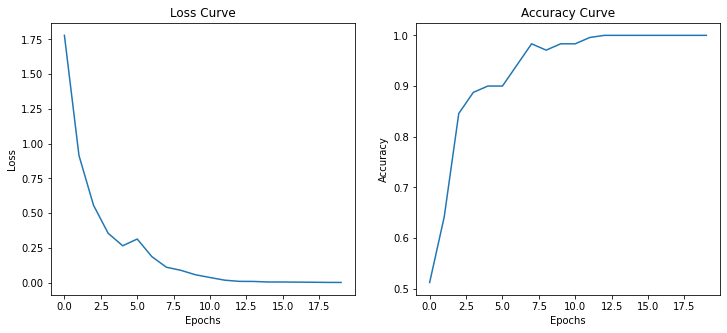

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Preprocess Test Data

In [18]:
img_path_test = 'test/*.jpg'
img_test = glob.glob(img_path_test)

In [19]:
print(img_test)

['test\\apple_77.jpg', 'test\\apple_78.jpg', 'test\\apple_79.jpg', 'test\\apple_80.jpg', 'test\\apple_81.jpg', 'test\\apple_82.jpg', 'test\\apple_83.jpg', 'test\\apple_84.jpg', 'test\\apple_85.jpg', 'test\\apple_86.jpg', 'test\\apple_87.jpg', 'test\\apple_88.jpg', 'test\\apple_89.jpg', 'test\\apple_90.jpg', 'test\\apple_91.jpg', 'test\\apple_92.jpg', 'test\\apple_93.jpg', 'test\\apple_94.jpg', 'test\\apple_95.jpg', 'test\\banana_77.jpg', 'test\\banana_78.jpg', 'test\\banana_79.jpg', 'test\\banana_80.jpg', 'test\\banana_81.jpg', 'test\\banana_82.jpg', 'test\\banana_83.jpg', 'test\\banana_84.jpg', 'test\\banana_85.jpg', 'test\\banana_86.jpg', 'test\\banana_87.jpg', 'test\\banana_88.jpg', 'test\\banana_89.jpg', 'test\\banana_90.jpg', 'test\\banana_91.jpg', 'test\\banana_92.jpg', 'test\\banana_93.jpg', 'test\\banana_94.jpg', 'test\\mixed_21.jpg', 'test\\mixed_22.jpg', 'test\\mixed_23.jpg', 'test\\mixed_24.jpg', 'test\\mixed_25.jpg', 'test\\orange_77.jpg', 'test\\orange_78.jpg', 'test\\oran

In [20]:
x_test = None

for i in img_test:
    img_raw_test = Image.open(i).convert('RGB')
    img_resize_test = img_raw_test.resize((128,128))
    if x_test is None:
        x_test = img_resize_test
    else:
        x_test = np.concatenate((x_test, img_resize_test))

x_test = x_test.reshape(-1, 128, 128, 3)        
x_test.shape

(60, 128, 128, 3)

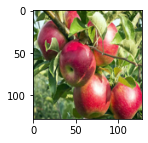

In [21]:
img2_test = Image.fromarray(x_test[0])

plt.subplots(figsize=(2,2))
plt.imshow(img2_test)

In [22]:
hot_encoding_test = []

for i in range(len(img_test)):
    if 'apple' in img_test[i]:
        hot_encoding_test.append([1,0,0,0])
    if 'banana' in img_test[i]:
        hot_encoding_test.append([0,1,0,0])
    if 'orange' in img_test[i]:
        hot_encoding_test.append([0,0,1,0])
    if 'mixed' in img_test[i]:
        hot_encoding_test.append([0,0,0,1])
    
hot_encoding_test

[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0]]

In [23]:
y_test = np.array(hot_encoding_test)

# Testing the model

In [24]:
loss, accuracy = model.evaluate(x=x_test/255, y=y_test)

print('loss = ', loss)
print('accuracy = ', accuracy)

2/2 [==============================] - 0s 34ms/step - loss: 1.1250 - accuracy: 0.8500
loss =  1.1250241994857788
accuracy =  0.8500000238418579


In [25]:
predictions = model.predict(x=x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])

Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1.0000000e+00 0.0000000e+00 1.6112451e-33 0.0000000e+00]
Actual:  [0 1 0 0] Predicted:  [0. 1. 0. 0.]
Actual:  [0 1 0 0] Predicted:  [0. 1. 0. 0.]
Actual:  [0

In [26]:
n_preds = len(predictions)

correct = 0
wrong = 0

for i in np.arange(n_preds):
    pred_max = np.argmax(predictions[i])
    actual_max = np.argmax(y_test[i])
    if pred_max == actual_max:
        correct += 1
    else:
        wrong += 1

print('correct =', correct, ', wrong =', wrong)
print('accuracy = ', correct/n_preds)

correct = 54 , wrong = 6
accuracy =  0.9


# Training with additional augmented data

In [27]:
#Image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
            rotation_range = 40,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            shear_range = 0.2,
            zoom_range = 0.2,
            horizontal_flip = True,
            fill_mode = 'nearest')

In [28]:
apple = []
banana = []
orange = []
mixed = []
        
for i in range(len(img_all)):
    if 'apple' in img_all[i]:
        apple.append(img_all[i])
    if 'banana' in img_all[i]:
        banana.append(img_all[i])
    if 'orange' in img_all[i]:
        orange.append(img_all[i])
    if 'mixed' in img_all[i]:
        mixed.append(img_all[i])

In [29]:
#number of images of all fruits respectively

print('Apple: ', len(apple))
print('Banana: ', len(banana))
print('Orange: ', len(orange))
print('Mixed: ', len(mixed))

Apple:  75
Banana:  73
Orange:  72
Mixed:  20


In [30]:
x_train_apple = None
x_train_banana = None
x_train_orange = None
x_train_mixed = None

for i in apple:
    img_raw_apple = Image.open(i).convert('RGB') #Convert all RGBA files to RGB for uniformity
    img_tiny_apple = img_raw_apple.resize((128,128)) #resize file to 128x128
    if x_train_apple is None:
        x_train_apple = img_tiny_apple
    else:
        x_train_apple = np.concatenate((x_train_apple, img_tiny_apple))

x_train_apple = x_train_apple.reshape(-1, 128, 128, 3) #reshape data

for i in banana:
    img_raw_banana = Image.open(i).convert('RGB') #Convert all RGBA files to RGB for uniformity
    img_tiny_banana = img_raw_banana.resize((128,128)) #resize file to 128x128
    if x_train_banana is None:
        x_train_banana = img_tiny_banana
    else:
        x_train_banana = np.concatenate((x_train_banana, img_tiny_banana))

x_train_banana = x_train_banana.reshape(-1, 128, 128, 3) #reshape data

for i in orange:
    img_raw_orange = Image.open(i).convert('RGB') #Convert all RGBA files to RGB for uniformity
    img_tiny_orange = img_raw_orange.resize((128,128)) #resize file to 128x128
    if x_train_orange is None:
        x_train_orange = img_tiny_orange
    else:
        x_train_orange = np.concatenate((x_train_orange, img_tiny_orange))

x_train_orange = x_train_orange.reshape(-1, 128, 128, 3) #reshape data

for i in mixed:
    img_raw_mixed = Image.open(i).convert('RGB') #Convert all RGBA files to RGB for uniformity
    img_tiny_mixed = img_raw_mixed.resize((128,128)) #resize file to 128x128
    if x_train_mixed is None:
        x_train_mixed = img_tiny_mixed
    else:
        x_train_mixed = np.concatenate((x_train_mixed, img_tiny_mixed))

x_train_mixed = x_train_mixed.reshape(-1, 128, 128, 3) #reshape data

print(x_train_apple.shape)
print(x_train_banana.shape)
print(x_train_orange.shape)
print(x_train_mixed.shape)

(75, 128, 128, 3)
(73, 128, 128, 3)
(72, 128, 128, 3)
(20, 128, 128, 3)


In [31]:
# Create additional training data by adding different image variations

count_apple = 0
for batch in train_datagen.flow(x_train_apple, batch_size=1,save_to_dir='train_augment', save_prefix='apple', save_format='jpg'):
    count_apple+=1
    if count_apple==len(apple)*2:
        break
        
count_banana = 0
for batch in train_datagen.flow(x_train_banana, batch_size=1,save_to_dir='train_augment', save_prefix='banana', save_format='jpg'):
    count_banana+=1
    if count_banana==len(banana)*2:
        break
        
count_orange = 0
for batch in train_datagen.flow(x_train_orange, batch_size=1,save_to_dir='train_augment', save_prefix='orange', save_format='jpg'):
    count_orange+=1
    if count_orange==len(orange)*2:
        break
        
count_mixed = 0
for batch in train_datagen.flow(x_train_mixed, batch_size=1,save_to_dir='train_augment', save_prefix='mixed', save_format='jpg'):
    count_mixed+=1
    if count_mixed==len(mixed)*2:
        break

In [32]:
img_path_augment = 'train_augment/*.jpg'
img_all_augment = glob.glob(img_path_augment)

In [33]:
apple_augment = []
banana_augment = []
orange_augment = []
mixed_augment = []
        
for i in range(len(img_all_augment)):
    if 'apple' in img_all_augment[i]:
        apple_augment.append(img_all_augment[i])
    if 'banana' in img_all_augment[i]:
        banana_augment.append(img_all_augment[i])
    if 'orange' in img_all_augment[i]:
        orange_augment.append(img_all_augment[i])
    if 'mixed' in img_all_augment[i]:
        mixed_augment.append(img_all_augment[i])

In [34]:
#number of images of all fruits respectively

print('Apple: ', len(apple_augment))
print('Banana: ', len(banana_augment))
print('Orange: ', len(orange_augment))
print('Mixed: ', len(mixed_augment))

Apple:  225
Banana:  219
Orange:  216
Mixed:  60


In [35]:
list_all = apple_augment + banana_augment + orange_augment + mixed_augment
len(list_all)

720

In [36]:
x_train_augment = None

for i in list_all:
    img_raw_augment = Image.open(i).convert('RGB')
    img_tiny_augment = img_raw_augment.resize((128,128))
    if x_train_augment is None:
        x_train_augment = img_tiny_augment
    else:
        x_train_augment = np.concatenate((x_train_augment, img_tiny_augment))

x_train_augment = x_train_augment.reshape(-1, 128, 128, 3) #reshape data
x_train_augment.shape

(720, 128, 128, 3)

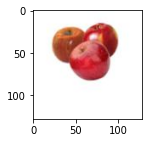

In [37]:
#Verify that data is reshaped correctly by randomly retrieving an individual data to view.

img_augment = Image.fromarray(x_train_augment[20])

plt.subplots(figsize=(2,2))
plt.imshow(img_augment)

In [38]:
hot_encoding_augment = []

for i in range(len(list_all)):
    if 'apple' in list_all[i]:
        hot_encoding_augment.append([1,0,0,0])
    if 'banana' in list_all[i]:
        hot_encoding_augment.append([0,1,0,0])
    if 'orange' in list_all[i]:
        hot_encoding_augment.append([0,0,1,0])
    if 'mixed' in list_all[i]:
        hot_encoding_augment.append([0,0,0,1])

print(len(hot_encoding_augment))
hot_encoding_augment

720


[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0,

In [39]:
y_train_augment = np.array(hot_encoding_augment)

In [40]:
#Constructing CNN model

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(128, 128, 3)))
model2.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(128, 128, 3)))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dropout(rate=0.5))
model2.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [41]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
hist_augment = model2.fit(x=x_train_augment/255, y=y_train_augment, batch_size=32, epochs=20)

Epoch 1/20
23/23 [==============================] - 17s 729ms/step - loss: 1.7419 - accuracy: 0.3931
Epoch 2/20
23/23 [==============================] - 17s 727ms/step - loss: 0.8282 - accuracy: 0.6528
Epoch 3/20
23/23 [==============================] - 17s 731ms/step - loss: 0.5659 - accuracy: 0.7667
Epoch 4/20
23/23 [==============================] - 17s 731ms/step - loss: 0.4185 - accuracy: 0.8472
Epoch 5/20
23/23 [==============================] - 17s 732ms/step - loss: 0.3119 - accuracy: 0.8958
Epoch 6/20
23/23 [==============================] - 17s 732ms/step - loss: 0.3219 - accuracy: 0.9056
Epoch 7/20
23/23 [==============================] - 17s 739ms/step - loss: 0.2338 - accuracy: 0.9403
Epoch 8/20
23/23 [==============================] - 18s 773ms/step - loss: 0.1519 - accuracy: 0.9597
Epoch 9/20
23/23 [==============================] - 19s 806ms/step - loss: 0.1784 - accuracy: 0.9500
Epoch 10/20
23/23 [==============================] - 19s 805ms/step - loss: 0.1302 - accura

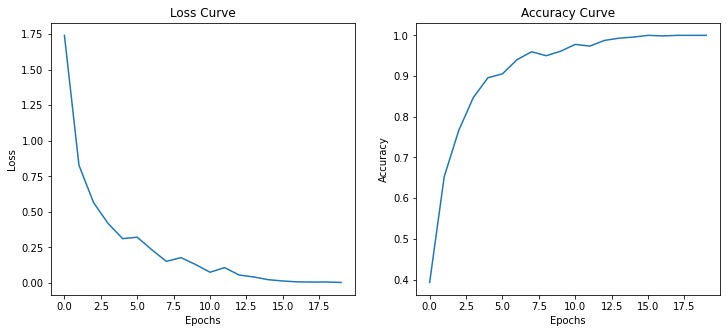

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].plot(hist_augment.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist_augment.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Test augmented model

In [44]:
loss, accuracy = model2.evaluate(x=x_test/255, y=y_test)

print('loss = ', loss)
print('accuracy = ', accuracy)

2/2 [==============================] - 0s 34ms/step - loss: 1.2824 - accuracy: 0.9167
loss =  1.2824352979660034
accuracy =  0.9166666865348816


In [45]:
predictions = model2.predict(x=x_test)
for i in np.arange(len(predictions)):
	print('Actual: ', y_test[i], 'Predicted: ', predictions[i])

Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [1. 0. 0. 0.]
Actual:  [1 0 0 0] Predicted:  [0. 0. 1. 0.]
Actual:  [0 1 0 0] Predicted:  [0. 1. 0. 0.]
Actual:  [0 1 0 0] Predicted:  [0. 1. 0. 0.]
Actual:  [0 1 0 0] Predicted:  [0. 1. 0. 0.]
Actual:  [

In [46]:
n_preds = len(predictions)

correct = 0
wrong = 0

for i in np.arange(n_preds):
    pred_max = np.argmax(predictions[i])
    actual_max = np.argmax(y_test[i])
    if pred_max == actual_max:
        correct += 1
    else:
        wrong += 1

print('correct =', correct, ', wrong =', wrong)
print('accuracy = ', correct/n_preds)

correct = 53 , wrong = 7
accuracy =  0.8833333333333333
